In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats
import scipy.stats as st

# Q1

## 1a
#### Linear correlation: Having n individuals and 2 variables X and Y belonging to the objects, the linear correlation gives the extent of varaibles X and Y changing in the same direction
#### r=(Sum(x(i)-x(mean))*Sum(y(i)-y(mean)))/sqrt[Sum(x(i)-x(mean))**2 * Sum(y(i)-y(mean))**2 ]
#### Rank correlation: Each x(i) and y(i) value is replaced by their rank: the biggest x value is substituted by 1, the second biggest by 2, etc. , the smallest by n. Same holds for values of variable Y.
#### r= 1-6*Sum((x(i)-y(i))**2)/(n*(n**2-1))

## 1b

In [2]:
df=pd.read_csv('belize_airbnb_listings.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


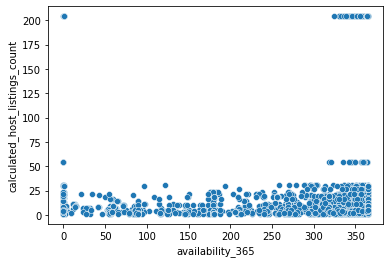

In [7]:
sns.scatterplot(y='calculated_host_listings_count', x='availability_365', data=df)
plt.show()

# 1c

In [8]:
df['calculated_host_listings_count'].corr(df['availability_365'])

0.17275502922698924

#### Correlation coefficient is very low. In the case of low calculated host numbers one cannot estimate the availability:
#### as for almost all host number there are numerous very different availability numbers.
#### whereas, for high host numbers the availability is either very low (0 days) or very high (>300 days)

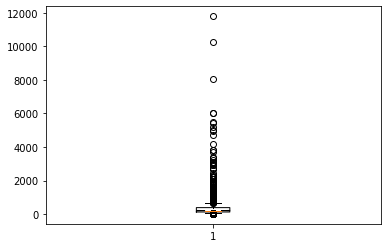

In [31]:
plt.boxplot(df['price'], notch=True, whis =[10,90], widths=0.1)
plt.show()

In [ ]:
matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)

<AxesSubplot:xlabel='price', ylabel='Count'>

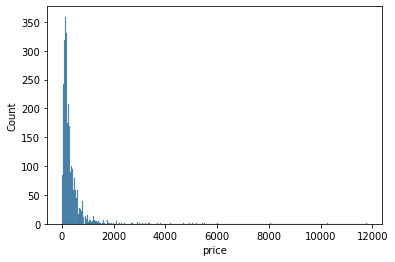

In [14]:
sns.histplot(df['price'])

#### The distribution of prices does not follow a normal distribution. There are a lot of low-priced AirBNBs and a few highly priced ones.
#### Therefore the asymmetric outlook of the box plot. The mean still lows in the region of the cheaper ones 
#### but there is a relatively high number of apartments whose price is well above the Q3+1.5*IQR range

In [15]:
df['price'].describe()

count     2796.000000
mean       357.102289
std        563.124825
min         20.000000
25%        135.000000
50%        220.000000
75%        394.250000
max      11788.000000
Name: price, dtype: float64

In [ ]:
#### If instead, the logarithm of the prices are taken, they show something closer to a normal distribution

In [32]:
df_logprice=np.log(df['price'])

Text(0.5, 0, 'Log(price)')

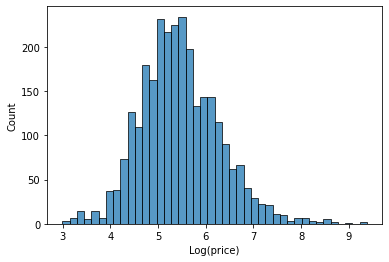

In [36]:
sns.histplot(df_logprice)
plt.xlabel('Log(price)')

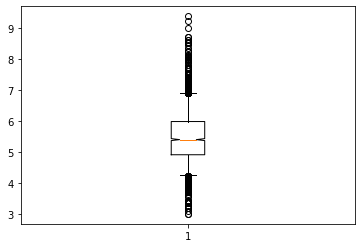

In [38]:
plt.boxplot(df_logprice, notch=True, whis =[5,95], widths=0.1)
plt.show()

In [39]:
mu_pr, std_pr = norm.fit(df_logprice)

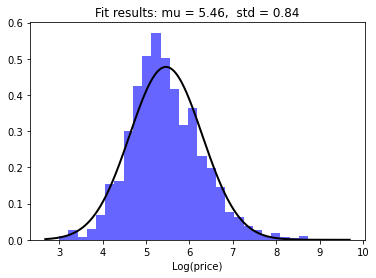

In [41]:
plt.hist(df_logprice, bins=30, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(df_logprice))
p = norm.pdf(x, mu_pr, std_pr)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Log(price)')
title = "Fit results: mu = %.2f,  std = %.2f" % (mu_pr, std_pr)
plt.title(title)

plt.show()